In [16]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pdc
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit
import seaborn as sns

In [247]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.gofplots import qqplot

In [ ]:
model = ols("observations ~ C(cotton_weight_percent)", dfclus2hr).fit()
res = anova_lm(model, typ=1)

In [10]:
ttdm2wt = np.load('mode1_allpars_wtpmlkl_ttds.npy')
ttdm2a20kd = np.load('mode1_allpars_a20kd_ttds.npy')
ttdm2a20oe = np.load('mode1_allpars_a2oed_ttds.npy')
ttdm2cyldkd = np.load('mode1_allpars_cyldkd_ttds.npy')
ttdm2cyldoe = np.load('mode1_allpars_cyldoe_ttds.npy')
ttdm2ciapkd = np.load('mode1_allpars_ciapkd_ttds.npy')
ttdm2ciapoe = np.load('mode1_allpars_ciapoe_ttds.npy')

In [11]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2a20kd2 = [ttdm2a20kd / 60 for ttdm2a20kd in ttdm2a20kd]
ttdm2a20oe2 = [ttdm2a20oe / 60 for ttdm2a20oe in ttdm2a20oe]
ttdm2cyldkd2 = [ttdm2cyldkd / 60 for ttdm2cyldkd in ttdm2cyldkd]
ttdm2cyldoe2 = [ttdm2cyldoe / 60 for ttdm2cyldoe in ttdm2cyldoe]
ttdm2ciapkd2 = [ttdm2ciapkd / 60 for ttdm2ciapkd in ttdm2ciapkd]
ttdm2ciapoe2 = [ttdm2ciapoe/60 for ttdm2ciapoe in ttdm2ciapoe]

In [30]:
print(np.mean(ttdm2wt2))
print(np.mean(ttdm2a20kd2))
print(np.mean(ttdm2a20oe2))
print(np.mean(ttdm2ciapkd2))
print(np.mean(ttdm2ciapoe2))
print(np.mean(ttdm2cyldkd2))
print(np.mean(ttdm2cyldoe2))

10.744734962296299
11.35611305829412
10.300606761372954
10.914455818710932
10.763032305943371
10.413234235461214
12.192723866595884


In [249]:
WT = ttdm2wt2
A20KD = ttdm2a20kd2
A20OE = ttdm2a20oe2
CIAPKD = ttdm2ciapkd2
CIAPOE = ttdm2ciapoe2
CYLDKD = ttdm2cyldkd2
CYLDOE = ttdm2cyldoe2

In [251]:
mode1df2t = pd.DataFrame({'WT': WT,
                         'A20KD': A20KD,
                          'A20OE': A20OE,
                        'cIAPKD': CIAPKD,
                         'CIAPOE': CIAPOE,
                        'CYLDKD': CYLDKD,
                          'CYLDOE': CYLDOE})
dfclus2hrt = pd.DataFrame(data = mode1df2t,
                        columns = ['WT','A20KD','A20OE','cIAPKD','cIAPOE','CYLDKD','CYLDOE'])

In [254]:
comparison = MultiComparison(dfclus2hrt['WT'], dfclus2hrt['A20KD'], 
                                dfclus2hrt['A20OE'], dfclus2hrt['cIAPKD'],
                               dfclus2hrt['cIAPOE'],dfclus2hrt['CYLDKD'],
                               dfclus2hrt['CYLDOE'])
comparison_results = comparison.tukeyhsd()
comparison_results.summary()

TypeError: __init__() takes from 3 to 4 positional arguments but 8 were given

In [17]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2,
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'cIAP KD': ttdm2ciapkd2,
                         'cIAP OE': ttdm2ciapoe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KD','A20 OE','cIAP KD','cIAP OE','CYLD KD','CYLD OE'])

In [215]:
f, p = st.f_oneway(dfclus2hr['WT'], dfclus2hr['A20 KD'])
print("F=%f, p-value = %f"%(f,p))

F=147.085598, p-value = 0.000000


In [210]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(dfclus2hr['WT'], dfclus2hr['A20 KD'], 
                                dfclus2hr['A20 OE'], dfclus2hr['cIAP KD'],
                               dfclus2hr['cIAP OE'],dfclus2hr['CYLD KD'],
                               dfclus2hr['CYLD OE'])
print(fvalue, pvalue)

268.5864906867454 0.0


In [212]:
from scipy import stats as st

In [213]:
def tukey_hsd(group_names , *args ):
    endog = np.hstack(args)
    groups_list = []
    for i in range(len(args)):
        for j in range(len(args[i])):
            groups_list.append(group_names[i])
    groups = np.array(groups_list)
    res = pairwise_tukeyhsd(endog, groups)
    print (res.pvalues) #print only p-value
    print(res) #print result

In [ ]:
print(tukey_hsd(['A', 'B', 'C'], tdata['A'], tdata['B'],tdata['C']))

In [211]:
dfclus2hr.describe()

,WT,A20 KD,A20 OE,cIAP KD,cIAP OE,CYLD KD,CYLD OE
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,10.744735,11.356113,10.300607,10.914456,10.763032,10.413234,12.192724
std,2.047015,2.229570,2.133947,2.262920,2.558142,2.010790,3.111656
min,4.689379,5.410822,4.208417,5.591182,3.727455,4.388778,5.711423
25%,10.100200,10.220441,9.919840,10.160321,10.040080,9.979960,10.280561
50%,10.521042,10.701403,10.220441,10.641283,10.521042,10.340681,10.881764
75%,11.062124,12.204409,10.521042,11.182365,11.062124,10.641283,13.527054
max,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000


In [207]:
dfclus2hr['WT'].describe()

count    3605.000000
mean       10.744735
std         2.047015
min         4.689379
25%        10.100200
50%        10.521042
75%        11.062124
max        35.000000
Name: WT, dtype: float64

In [208]:
dfclus2hr['A20 KD'].describe()

count    3605.000000
mean       11.356113
std         2.229570
min         5.410822
25%        10.220441
50%        10.701403
75%        12.204409
max        35.000000
Name: A20 KD, dtype: float64

In [366]:
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
from scipy.stats import median_test
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['A20 KD']))
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['A20 OE']))
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['cIAP KD']))
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['cIAP OE']))
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['CYLD KD']))
print(ks_2samp(dfclus2hr['WT'], dfclus2hr['CYLD OE']))

Ks_2sampResult(statistic=0.2171983356449375, pvalue=1.0352049116857388e-74)
Ks_2sampResult(statistic=0.29819694868238555, pvalue=1.8953988132789034e-140)
Ks_2sampResult(statistic=0.056588072122052635, pvalue=1.8136537842974134e-05)
Ks_2sampResult(statistic=0.027184466019417486, pvalue=0.13715267428805725)
Ks_2sampResult(statistic=0.22635228848821076, pvalue=4.1823487828147613e-81)
Ks_2sampResult(statistic=0.29209431345353676, pvalue=8.917504379171145e-135)


In [367]:
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['A20 KD']))
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['A20 OE']))
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['cIAP KD']))
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['cIAP OE']))
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['CYLD KD']))
print(ttest_ind(dfclus2hr['WT'], dfclus2hr['CYLD OE']))

Ttest_indResult(statistic=-12.127885160015444, pvalue=1.5918381053856166e-33)
Ttest_indResult(statistic=9.017910134633876, pvalue=2.420720124450326e-19)
Ttest_indResult(statistic=-3.339549907277563, pvalue=0.0008434019797019825)
Ttest_indResult(statistic=-0.3353146771299229, pvalue=0.7373974814273296)
Ttest_indResult(statistic=6.936552680796471, pvalue=4.366586260487475e-12)
Ttest_indResult(statistic=-23.341985683379498, pvalue=3.1246572456279917e-116)


In [369]:
print(median_test(dfclus2hr['WT'], dfclus2hr['A20 KD']))
print(median_test(dfclus2hr['WT'], dfclus2hr['A20 OE']))
print(median_test(dfclus2hr['WT'], dfclus2hr['cIAP KD']))
print(median_test(dfclus2hr['WT'], dfclus2hr['cIAP OE']))
print(median_test(dfclus2hr['WT'], dfclus2hr['CYLD KD']))
print(median_test(dfclus2hr['WT'], dfclus2hr['CYLD OE']))

(48.72953051326308, 2.9380906134084846e-12, 10.641282565130261, array([[1564, 1861],
       [2041, 1744]]))
(408.47360980827517, 7.877418257793403e-91, 10.340681362725451, array([[2210, 1351],
       [1395, 2254]]))
(21.10214503385761, 4.354404262239253e-06, 10.5811623246493, array([[1673, 1869],
       [1932, 1736]]))
(1.740287898525487, 0.18710235223167618, 10.521042084168336, array([[1801, 1744],
       [1804, 1861]]))
(177.11118315427365, 2.0710657672464513e-40, 10.400801603206414, array([[2072, 1506],
       [1533, 2099]]))
(155.71659915216355, 9.763311468529726e-36, 10.701402805611222, array([[1439, 1969],
       [2166, 1636]]))


No handles with labels found to put in legend.


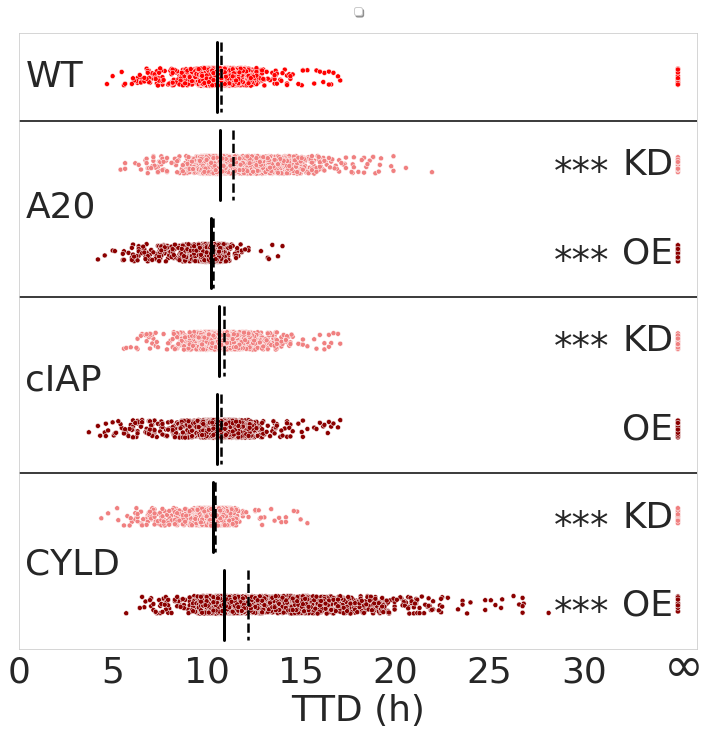

In [412]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (10,10))
my_pal = {"WT": "red",
          "A20 KD":"lightcoral", "A20 OE":"darkred",
          "cIAP KD": "lightcoral", "cIAP OE":"darkred",
         "CYLD KD": "lightcoral", "CYLD OE":"darkred",}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
medianprops = dict(linestyle='-', linewidth=3, color='k')
#            meanprops=meanpointprops,
# boxprops = dict(linestyle='*', linewidth=30, color='k')
# b = sns.boxplot(showmeans=False,
#             meanline=False,
#             medianprops= medianprops,
#             whiskerprops={'visible': False},
#             zorder=10,
#             x="value",
#             y="variable",
#             data=pd.melt(dfclus2hr),
#             showfliers=False,
#             showbox=False,
#             showcaps=False,
#             ax=b)
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 36)
plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 36)
plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 36)
plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 36)#(-0.2,.7)
plt.annotate('KD', xy = (0.89,.77), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.625), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.483), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.34), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('KD', xy = (0.89,.197), xycoords ='axes fraction', fontsize = 36) #(-0.2,.42)
plt.annotate('OE', xy = (0.89,.055), xycoords ='axes fraction', fontsize = 36) #(-0.2,.12)
plt.annotate('***', xy = (0.79,.755), xycoords ='axes fraction', fontsize = 37) #a20kd
plt.annotate('***', xy = (0.79,.61), xycoords ='axes fraction', fontsize = 37)#a20oe 
plt.annotate('***', xy = (0.79,.47), xycoords ='axes fraction', fontsize = 37) #ciapkd
plt.annotate('***', xy = (0.79,.18), xycoords ='axes fraction', fontsize = 37) #cyldkd
plt.annotate('***', xy = (0.79,.04), xycoords ='axes fraction', fontsize = 37) #cyldoe

plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 48)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("TTD (h)",fontsize = 36)
plt.xticks(fontsize = 36)
b.set_ylabel("")
b.tick_params(labelsize=36)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode1_initsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_medwsig.pdf')

No handles with labels found to put in legend.


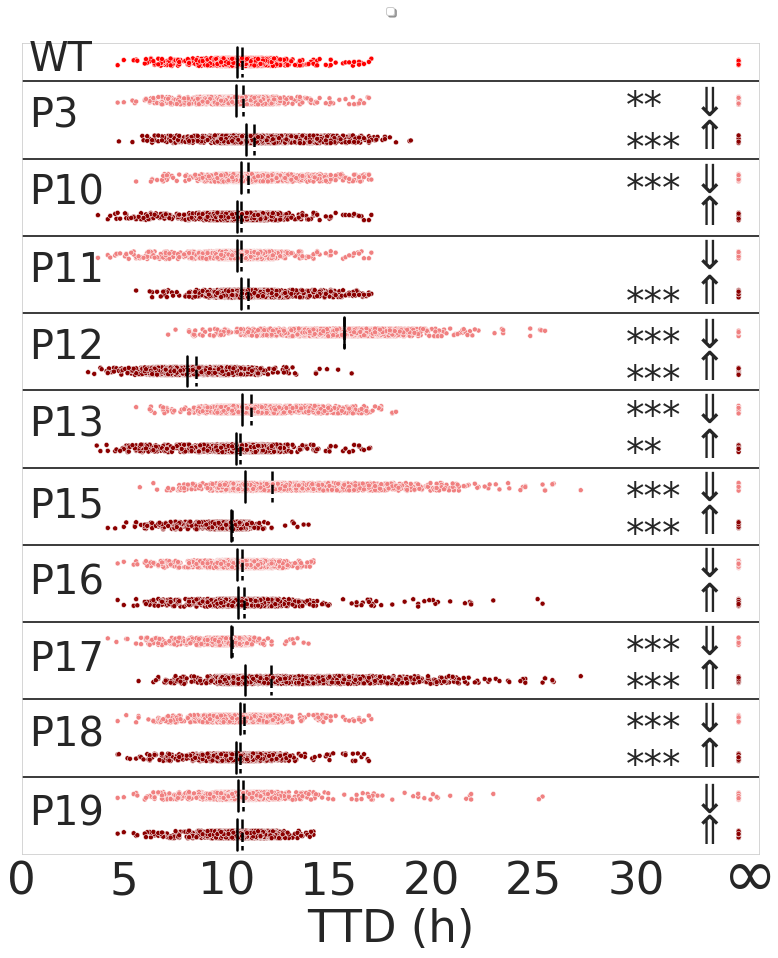

In [410]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (11,13))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)
# medianprops = dict(marker='-', markeredgecolor='black',
#                       markerfacecolor='k')
# medianprops = dict(linestyle='--', linewidth=3, color='k')
# meanlineprops = dict(linestyle='-', linewidth=2.5, color='black')
medianprops = dict(linestyle = '-', linewidth=2.5, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode1hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
# medians = pd.melt(dfmode1hr).groupby(['value'])['variable'].median()
# vertical_offset = pd.melt(dfmode1hr)['variable'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='large',color='black',weight='semibold')
# for median in b['medians']:
#     median.set(color='k', linewidth=1.5)
#     x,y = median.get_data()
#     xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
#     plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)
#{'color': 'k', marker='D','lw': 30},

# labels = [e.get_text() for e in plt.gca().get_xticklabels()]
# print(labels)
# ticks = plt.gca().get_xticks()
# w = 0.1
# for day, idx in enumerate(labels):
#     idx = labels.index(day)
#     plt.hlines(pd.melt(dfmode1hr)[pd.melt(dfmode1hr)['value'] == day]['variable'].mean(), ticks[idx]-w, ticks[idx]+w)
# plt.plot([np.mean(dfmode1hr['WT'])],[0], '*','k', ms=7)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate(r'$\Downarrow$', xy = (0.90,.91), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.869), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.815), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.775), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.721), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.678), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.624), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.584), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.531), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.488), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.435), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.394), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.341), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.298), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.245), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.203), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.15), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.107), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\Downarrow$', xy = (0.90,.05), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate(r'$\Uparrow$', xy = (0.90,.012), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
# plt.plot([11], [1], 'o', ms=20, zorder =2)
# # plt.axhline(y=18.5, color = 'k')
# # plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (0.01,.895), xycoords ='axes fraction', fontsize = 40)#(-0.2,.7)
plt.annotate('P10', xy = (0.01,.80), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P11', xy = (0.01,.705), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P12', xy = (0.01,.61), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P13', xy = (0.01,.515), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P15', xy = (0.01,.415), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P16', xy = (0.01,.32), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P17', xy = (0.01,.225), xycoords ='axes fraction', fontsize = 40) #(-0.2,.42)
plt.annotate('P18', xy = (0.01,.132), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate('P19', xy = (0.01,.035), xycoords ='axes fraction', fontsize = 40) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 65)

plt.annotate('**', xy = (0.82,.907), xycoords ='axes fraction', fontsize = 37) #p3kd
plt.annotate('***', xy = (0.82,.855), xycoords ='axes fraction', fontsize = 37) #p3oe
plt.annotate('***', xy = (0.82,.805), xycoords ='axes fraction', fontsize = 37) #p10kd
plt.annotate('***', xy = (0.82,.665), xycoords ='axes fraction', fontsize = 37) #p11oe

plt.annotate('***', xy = (0.82,.615), xycoords ='axes fraction', fontsize = 37) #p12kd
plt.annotate('***', xy = (0.82,.57), xycoords ='axes fraction', fontsize = 37) #p12oe
plt.annotate('***', xy = (0.82,.525), xycoords ='axes fraction', fontsize = 37) #p13kd
plt.annotate('**', xy = (0.82,.48), xycoords ='axes fraction', fontsize = 37) #p13kd
plt.annotate('***', xy = (0.82,.425), xycoords ='axes fraction', fontsize = 37) #p15kd
plt.annotate('***', xy = (0.82,.38), xycoords ='axes fraction', fontsize = 37) #p15kd
# plt.annotate('*', xy = (0.82,.285), xycoords ='axes fraction', fontsize = 37) #p16oe
plt.annotate('***', xy = (0.82,0.235), xycoords ='axes fraction', fontsize = 37) #p17kd
plt.annotate('***', xy = (0.82,.19), xycoords ='axes fraction', fontsize = 37) #p17oe
plt.annotate('***', xy = (0.82,0.14), xycoords ='axes fraction', fontsize = 37) #p18kd
plt.annotate('***', xy = (0.82,.0945), xycoords ='axes fraction', fontsize = 37) #p18oe


# plt.annotate('*', xy = (0.292,0.964), xycoords ='axes fraction', fontsize = 20, color = 'k')
# plt.annotate('*', xy = (0.293,0.918), xycoords ='axes fraction', fontsize = 20, color = 'k')
# plt.annotate('*', xy = (11,2.25), xycoords ='data', fontsize = 20, color = 'k')
# plt.hlines(pd.melt(dfmode1hr)[pd.melt(dfmode1hr)['value'] == day]['total_bill'].mean(), ticks[idx]-w, ticks[idx]+w)
# print(plt.yticks()[0])
b.set_xlabel("TTD (h)",fontsize = 45)
plt.xticks(fontsize = 45)
b.set_ylabel("")
b.tick_params(labelsize=45)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode1_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_medsig.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,9))
my_pal = {"WT": "red",
          "A20 KD":"lightcoral", "A20 OE":"darkred",
          "cIAP KD": "lightcoral", "cIAP OE":"darkred",
         "CYLD KD": "lightcoral", "CYLD OE":"darkred",}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '|', 'lw': 10},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)


plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_initsens_100tnf_stripdots_hrs_kdoeinside.pdf')

In [22]:
dfmode1hr = pd.read_csv("mode1_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


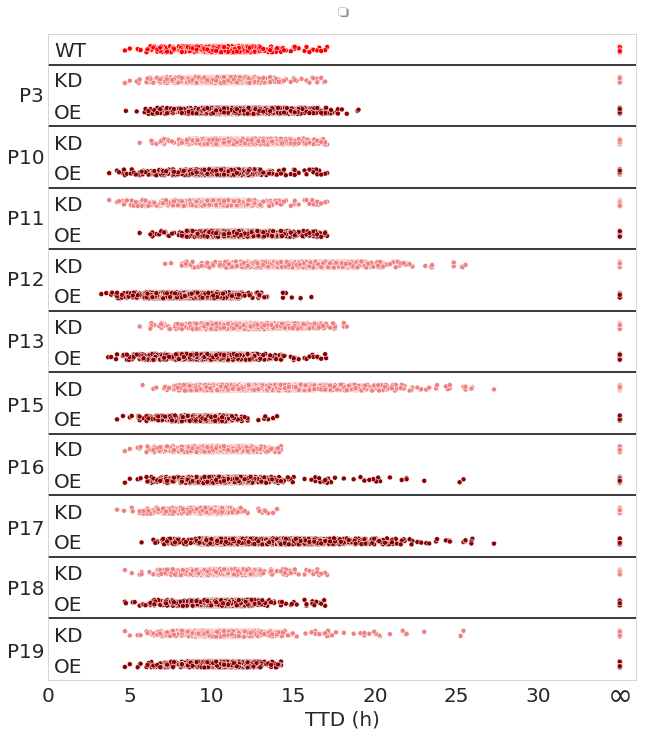

In [43]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.919), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.869), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.821), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.775), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.727), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.678), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.630), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.584), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.537), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.441), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.394), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.347), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.298), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.25), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.203), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.155), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.107), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.06), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.012), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# # plt.axhline(y=18.5, color = 'k')
# # plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (-0.05,.895), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P10', xy = (-0.07,.80), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P11', xy = (-0.07,.705), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P12', xy = (-0.07,.61), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.515), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P15', xy = (-0.07,.415), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P16', xy = (-0.07,.32), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P17', xy = (-0.07,.225), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P18', xy = (-0.07,.132), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P19', xy = (-0.07,.035), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite.pdf')

In [363]:
from scipy.stats import ks_2samp
#KS TEST
print('P3KD','P3OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P3 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P3 OE']))
print('P10KD','P10OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P10 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P10 OE']))
print('P11KD','P11OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P11 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P11 OE']))
print('P12KD','P12OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P12 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P12 OE']))
print('P13KD','P13OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P13 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P13 OE']))
print('P15KD','P15OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P15 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P15 OE']))
print('P16KD','P16OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P16 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P16 OE']))
print('P17KD','P17OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P17 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P17 OE']))
print('P18KD','P18OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P18 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P18 OE']))
print('P19KD','P19OE')
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P19 KD']))
print(ks_2samp(dfmode1hr['WT'], dfmode1hr['P19 OE']))

P3KD P3OE
Ks_2sampResult(statistic=0.05908460471567269, pvalue=6.365251397493861e-06)
Ks_2sampResult(statistic=0.20277392510402226, pvalue=3.5829643344409247e-65)
P10KD P10OE
Ks_2sampResult(statistic=0.08654646324549242, pvalue=3.207550873507353e-12)
Ks_2sampResult(statistic=0.027184466019417486, pvalue=0.13715267428805725)
P11KD P11OE
Ks_2sampResult(statistic=0.025520110957004155, pvalue=0.18841281185698244)
Ks_2sampResult(statistic=0.08682385575589457, pvalue=2.69428995764516e-12)
P12KD P12OE
Ks_2sampResult(statistic=0.9320388349514563, pvalue=0.0)
Ks_2sampResult(statistic=0.7206657420249654, pvalue=0.0)
P13KD P13OE
Ks_2sampResult(statistic=0.11595006934812768, pvalue=1.349864498721762e-21)
Ks_2sampResult(statistic=0.04965325936199723, pvalue=0.0002622563727129861)
P15KD P15OE
Ks_2sampResult(statistic=0.2923717059639389, pvalue=4.9538742921668956e-135)
Ks_2sampResult(statistic=0.29875173370318997, pvalue=5.704254553644229e-141)
P16KD P16OE
Ks_2sampResult(statistic=0.00582524271844664

In [364]:
#T TEST
print('P3KD','P3OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P3 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P3 OE']))
print('P10KD','P10OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P10 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P10 OE']))
print('P11KD','P11OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P11 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P11 OE']))
print('P12KD','P12OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P12 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P12 OE']))
print('P13KD','P13OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P13 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P13 OE']))
print('P15KD','P15OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P15 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P15 OE']))
print('P16KD','P16OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P16 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P16 OE']))
print('P17KD','P17OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P17 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P17 OE']))
print('P18KD','P18OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P18 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P18 OE']))
print('P19KD','P19OE')
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P19 KD']))
print(ttest_ind(dfmode1hr['WT'], dfmode1hr['P19 OE']))

P3KD P3OE
Ttest_indResult(statistic=-1.1962546492622477, pvalue=0.23163654814038664)
Ttest_indResult(statistic=-12.50186458926346, pvalue=1.6991309088272172e-35)
P10KD P10OE
Ttest_indResult(statistic=-6.172964519470617, pvalue=7.065454401220752e-10)
Ttest_indResult(statistic=0.777690676769291, pvalue=0.4367769138942509)
P11KD P11OE
Ttest_indResult(statistic=0.6174606069521573, pvalue=0.5369504620262904)
Ttest_indResult(statistic=-5.97151475295722, pvalue=2.4622382611019217e-09)
P12KD P12OE
Ttest_indResult(statistic=-107.13267193950603, pvalue=0.0)
Ttest_indResult(statistic=41.596016215635515, pvalue=0.0)
P13KD P13OE
Ttest_indResult(statistic=-8.798252732613086, pvalue=1.7172100171468285e-18)
Ttest_indResult(statistic=1.8597998995539424, pvalue=0.06295455011491373)
P15KD P15OE
Ttest_indResult(statistic=-23.28632740806829, pvalue=1.0466399191316632e-115)
Ttest_indResult(statistic=9.717738847401412, pvalue=3.4649085416729196e-22)
P16KD P16OE
Ttest_indResult(statistic=0.10856962501610076, 

In [365]:
#Median Test
from scipy.stats import median_test
print('P3KD','P3OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P3 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P3 OE']))
print('P10KD','P10OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P10 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P10 OE']))
print('P11KD','P11OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P11 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P11 OE']))
print('P12KD','P12OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P12 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P12 OE']))
print('P13KD','P13OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P13 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P13 OE']))
print('P15KD','P15OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P15 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P15 OE']))
print('P16KD','P16OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P16 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P16 OE']))
print('P17KD','P17OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P17 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P17 OE']))
print('P18KD','P18OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P18 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P18 OE']))
print('P19KD','P19OE')
print(median_test(dfmode1hr['WT'], dfmode1hr['P19 KD']))
print(median_test(dfmode1hr['WT'], dfmode1hr['P19 OE']))

P3KD P3OE
(10.581744055365576, 0.0011420986378384388, 10.521042084168336, array([[1801, 1662],
       [1804, 1943]]))
(245.4100712237029, 2.6008901486158537e-55, 10.701402805611224, array([[1439, 2105],
       [2166, 1500]]))
P10KD P10OE
(49.05798171302896, 2.4850694675054025e-12, 10.64128256513026, array([[1564, 1862],
       [2041, 1743]]))
(1.5005007739233358, 0.22059432575214852, 10.521042084168336, array([[1801, 1748],
       [1804, 1857]]))
P11KD P11OE
(1.4433317940429462, 0.22960094382804347, 10.521042084168336, array([[1801, 1749],
       [1804, 1856]]))
(45.18926360371939, 1.788830803123667e-11, 10.64128256513026, array([[1564, 1850],
       [2041, 1755]]))
P12KD P12OE
(6181.580511052626, 0.0, 12.264529058116233, array([[ 129, 3468],
       [3476,  137]]))
(3399.876543447469, 0.0, 9.919839679358716, array([[3003,  527],
       [ 602, 3078]]))
P13KD P13OE
(75.19869787970313, 4.256477244373627e-18, 10.64128256513026, array([[1564, 1933],
       [2041, 1672]]))
(7.998367415989755

In [158]:
mel = pd.melt(dfmode1hr)
mel.head()

,variable,value
0,WT,10.340681
1,WT,11.843687
2,WT,11.963928
3,WT,9.979960
4,WT,10.521042


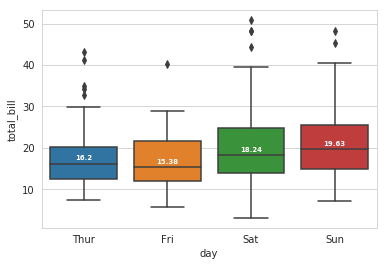

In [150]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
box_plot = sns.boxplot(x="day",y="total_bill",data=tips)

medians = tips.groupby(['day'])['total_bill'].median()
vertical_offset = tips['total_bill'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

Text(0.5, 1.0, 'Using showmeans')

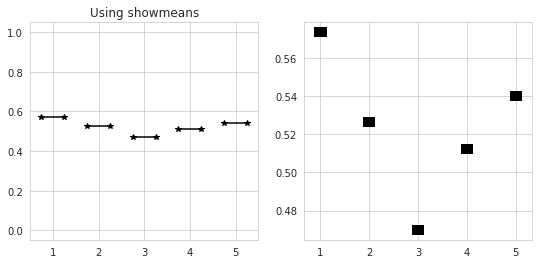

In [151]:
data_to_plot = np.random.rand(100,5)
positions = np.arange(5) + 1

fig, ax = plt.subplots(1,2, figsize=(9,4))

# matplotlib > 1.4
medianprops = dict(marker='*', linewidth=4, color='k')
bp = ax[0].boxplot(data_to_plot, positions=positions, showmeans=False,
                   showfliers=False,whiskerprops={'visible': False},medianprops=medianprops,
            showbox=False,
            showcaps=False)
for median in bp['medians']:
    median.set(color='k', linewidth=1.5,)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
    plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)
ax[0].set_title("Using showmeans")

#matpltolib < 1.4
# bp = ax[1].boxplot(data_to_plot, positions=positions)
# means = [np.mean(data) for data in data_to_plot.T]
# ax[1].plot(positions, means, 'rs')
# ax[1].set_title("Plotting means manually")

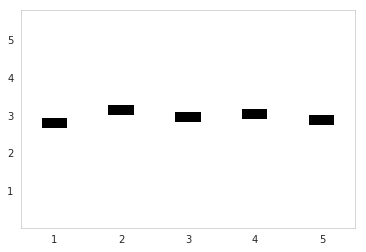

In [139]:
data = np.random.normal(loc=3., size=(100,5))

bp = plt.boxplot(data,sym='',widths=0.75, patch_artist=True, showmeans=False,
                   showfliers=False,whiskerprops={'visible': False},medianprops={'visible': False},
            showbox=False,
            showcaps=False)

for median in bp['medians']:
    median.set(color='k', linewidth=1.5)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
    plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)

plt.show()

In [ ]:
sns.boxplot(showmean=True,
            meanline=False,
            medianprops={'visible':False},
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode1hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)

In [118]:
print(np.median(dfmode1hr['WT']))
print(np.median(dfmode1hr['P3 KD']))
print(np.median(dfmode1hr['P3 OE']))
print(np.median(dfmode1hr['P10 KD']))
print(np.median(dfmode1hr['P10 OE']))
print(np.median(dfmode1hr['P11 KD']))
print(np.median(dfmode1hr['P11 OE']))
print(np.median(dfmode1hr['P12 KD']))
print(np.median(dfmode1hr['P12 OE']))

print(np.median(dfmode1hr['P13 KD']))
print(np.median(dfmode1hr['P13 OE']))
print(np.median(dfmode1hr['P15 KD']))
print(np.median(dfmode1hr['P15 OE']))
print(np.median(dfmode1hr['P16 KD']))
print(np.median(dfmode1hr['P16 OE']))

print(np.median(dfmode1hr['P17 KD']))
print(np.median(dfmode1hr['P17 OE']))
print(np.median(dfmode1hr['P18 KD']))
print(np.median(dfmode1hr['P18 OE']))
print(np.median(dfmode1hr['P19 KD']))
print(np.median(dfmode1hr['P10 OE']))

10.521042084168336
10.460921843687377
10.94188376753507
10.701402805611224
10.521042084168336
10.521042084168336
10.701402805611224
15.751503006012024
8.056112224448897
10.761523046092183
10.460921843687377
10.881763527054106
10.220440881763524
10.521042084168336
10.5811623246493
10.220440881763524
10.881763527054106
10.64128256513026
10.460921843687377
10.5811623246493
10.521042084168336


In [80]:
print(np.median(dfmode1hr['WT']))
print(np.median(dfmode1hr['P3 KD']))
print(np.median(dfmode1hr['P3 OE']))
print(np.median(dfmode1hr['P10 KD']))
print(np.median(dfmode1hr['P10 OE']))
print(np.median(dfmode1hr['P11 KD']))
print(np.median(dfmode1hr['P11 OE']))
print(np.median(dfmode1hr['P12 KD']))
print(np.median(dfmode1hr['P12 OE']))

print(np.median(dfmode1hr['P13 KD']))
print(np.median(dfmode1hr['P13 OE']))
print(np.median(dfmode1hr['P15 KD']))
print(np.median(dfmode1hr['P15 OE']))
print(np.median(dfmode1hr['P16 KD']))
print(np.median(dfmode1hr['P16 OE']))

print(np.median(dfmode1hr['P17 KD']))
print(np.median(dfmode1hr['P17 OE']))
print(np.median(dfmode1hr['P18 KD']))
print(np.median(dfmode1hr['P18 OE']))
print(np.median(dfmode1hr['P19 KD']))
print(np.median(dfmode1hr['P10 OE']))

10.744734962296299
10.817779803712835
11.345881777424475
11.063914236239471
10.705305201248546
10.713162802720557
11.048349125435335
15.75658946186409
8.500712937664511
11.21402583252497
10.646677543714334
12.218695365766207
10.28025259951248
10.739390014425522
10.853585117530486
10.257391343018908
12.179579686418606
10.855263925910071
10.641099119181499
10.828697617148306
10.705305201248546


In [77]:
dfmode1hr.columns

Index(['WT', 'P3 KD', 'P3 OE', 'P10 KD', 'P10 OE', 'P11 KD', 'P11 OE',
       'P12 KD', 'P12 OE', 'P13 KD', 'P13 OE', 'P15 KD', 'P15 OE', 'P16 KD',
       'P16 OE', 'P17 KD', 'P17 OE', 'P18 KD', 'P18 OE', 'P19 KD', 'P19 OE'],
      dtype='object')

In [203]:
print(ttdm2wt2.count(35))
print(ttdm2a20kd2.count(35))
print(ttdm2a20oe2.count(35))
print(ttdm2cyldkd2.count(35))
print(ttdm2cyldoe2.count(35))
print(ttdm2ciapkd2.count(35))
print(ttdm2ciapoe2.count(35))

20
15
24
21
14
26
33
